In [37]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb


In [2]:
path = r'creditcard.csv'
trans_df = pd.read_csv(path)
trans_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
fraud_trans = trans_df[trans_df['Class'] == 1]
not_fraud_trans = trans_df[trans_df['Class'] == 0]
print("Shape of the Data: ", trans_df.shape)
print("Count of Fraud Transactions :", len(fraud_trans))
print("")
trans_df.describe()

Shape of the Data:  (284807, 31)
Count of Fraud Transactions : 492



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

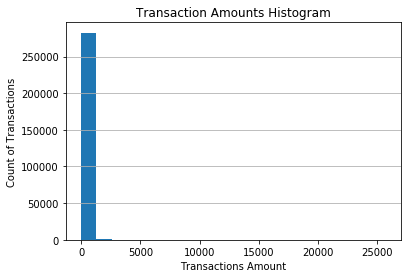

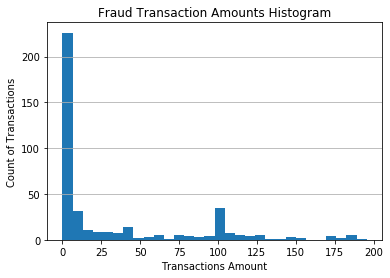

In [5]:
#Histogram with 100 bins
plt.title('Transaction Amounts Histogram')
plt.grid(which = 'major', axis='y')
plt.ylabel('Count of Transactions' )
plt.xlabel('Transactions Amount')
plt.hist(not_fraud_trans['Amount'], bins = 20)
plt.show()
#Fraud Transaction Amount Histogram
fraud_trans = fraud_trans[fraud_trans['Amount']<200]
plt.title('Fraud Transaction Amounts Histogram')
plt.grid(which = 'major', axis='y')
plt.ylabel('Count of Transactions' )
plt.xlabel('Transactions Amount')
plt.hist(fraud_trans['Amount'], bins = 30)
plt.show()

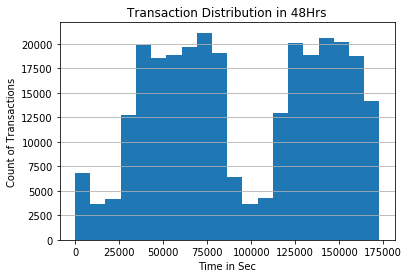

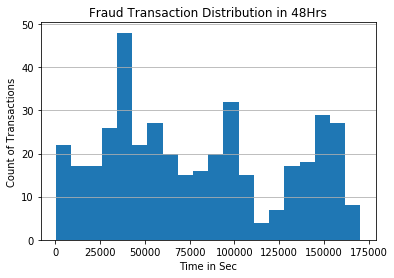

In [6]:
#Histogram with 100 bins
plt.title('Transaction Distribution in 48Hrs')
plt.grid(which = 'major', axis='y')
plt.ylabel('Count of Transactions' )
plt.xlabel('Time in Sec')
plt.hist(trans_df['Time'], bins = 20)
plt.show()
#Fraud Transaction Amount Histogram
plt.title('Fraud Transaction Distribution in 48Hrs')
plt.grid(which = 'major', axis='y')
plt.ylabel('Count of Transactions' )
plt.xlabel('Time in Sec')
plt.hist(fraud_trans['Time'], bins = 20)
plt.show()

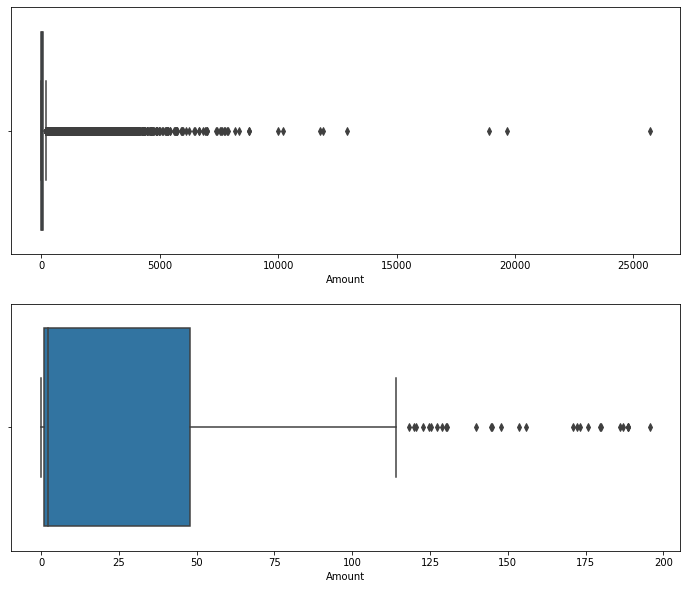

In [7]:
#Transaction Amount Distribution 
fig, axs = plt.subplots(2,figsize=(12,10))
sns.boxplot(x = trans_df['Amount'], ax=axs[0])
sns.boxplot(x = fraud_trans['Amount'], ax=axs[1])

# Null Value Analysis

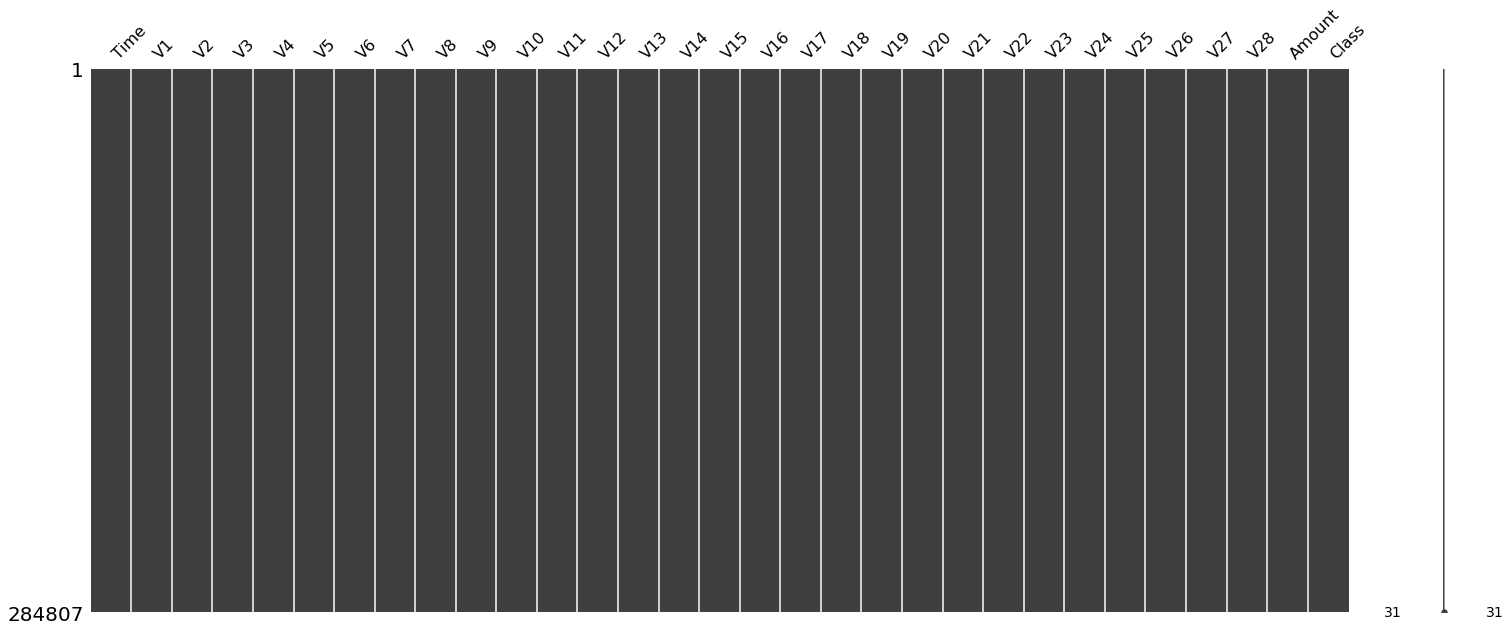

In [8]:
msno.matrix(trans_df)
# msno.matrix(trans_df[trans_df.isnull()])

In [9]:
def resample_data(X_train, y_train, fraud_percentage, total):   
    train = pd.concat([X_train, y_train], axis = 1)
    
    train_fraud = train[train['Class'] == 1]
    train_not_fraud = train[train['Class'] == 0]
    
    fraud_size = int(fraud_percentage * total)
    non_fraud_size = total - fraud_size
    #re-nsampling non-fraud and fraud transactions
    if len(train_not_fraud) != non_fraud_size:
        train_not_fraud = resample(train_not_fraud, replace = True, n_samples = non_fraud_size, random_state = 42).reset_index(drop = True)
    if len(train_fraud) != fraud_size:
        train_fraud = resample(train_fraud, replace = True, n_samples = fraud_size, random_state = 42).reset_index(drop = True)
    #merging the 2 classes back
    down_train = pd.concat([train_fraud, train_not_fraud], axis = 0)
    y_train = down_train['Class']
    X_train = down_train.drop('Class', axis = 1).reset_index(drop = True)
    return X_train, y_train

y = trans_df['Class']
X = trans_df.drop('Class', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Count before re-sampling   1:", list(y_train).count(1), ' 0:', list(y_train).count(0))
X_train, y_train = resample_data(X_train, y_train, 0.5, 788)
print("Count after re-sampling    1:", list(y_train).count(1), ' 0:', list(y_train).count(0))



Count before re-sampling   1: 394  0: 227451
Count after re-sampling    1: 394  0: 394


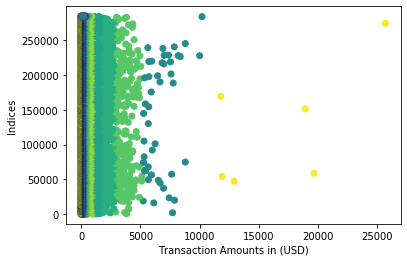

In [12]:
###Looking for outliers in the amount
from scipy import stats
from scipy import cluster
from scipy.cluster.vq import kmeans
import numpy as np

centroids, avg_distance = kmeans(trans_df["Amount"], 20)
groups, cdist = cluster.vq.vq(trans_df["Amount"], centroids)
plt.scatter(trans_df["Amount"], np.arange(0,len(trans_df["Amount"])), c=groups)
plt.xlabel('Transaction Amounts in (USD)')
plt.ylabel('Indices')
plt.show()

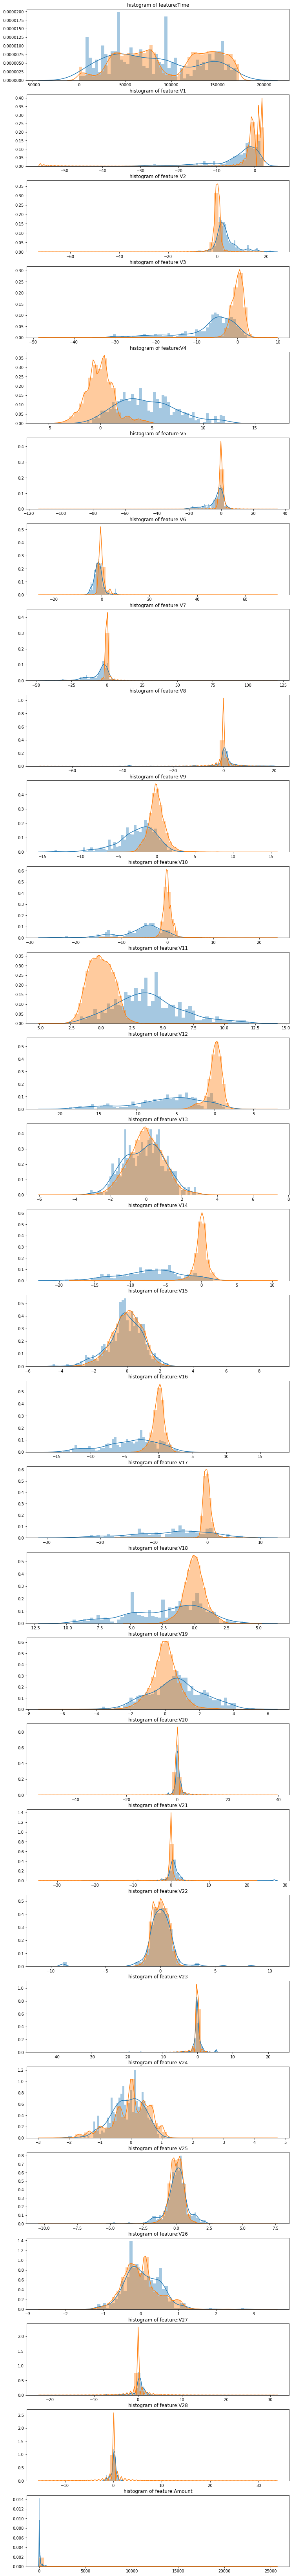

In [14]:
from matplotlib import gridspec
features = trans_df.iloc[:,0:30].columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31, 1)
for i, c in enumerate(trans_df[features]):
 ax = plt.subplot(gs[i])
 sns.distplot(trans_df[c][trans_df.Class == 1], bins=50)
 sns.distplot(trans_df[c][trans_df.Class == 0], bins=50)
 ax.set_xlabel('')
 ax.set_title('histogram of feature:' + str(c))
plt.show()

# Feature Engineering


In [20]:
imp_features = ['V13', 'V15', 'V22', 'V20', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
# imp_features = []
X_tr = X_train.drop(imp_features, axis = 1)
X_te = X_test.drop(imp_features, axis = 1)
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

# Modeling Approach 1

In [15]:
VALID_SIZE = 0.20 # simple validation using train_test_split
RANDOM_STATE = 2018
train_df, valid_df = train_test_split(trans_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True )

In [21]:
RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4
clf = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
                       oob_score=False, random_state=2018, verbose=False,
                       warm_start=False)

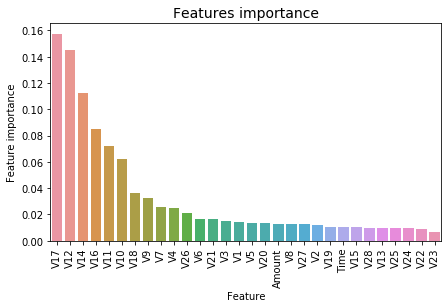

In [22]:
preds = clf.predict(valid_df[predictors])
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()  

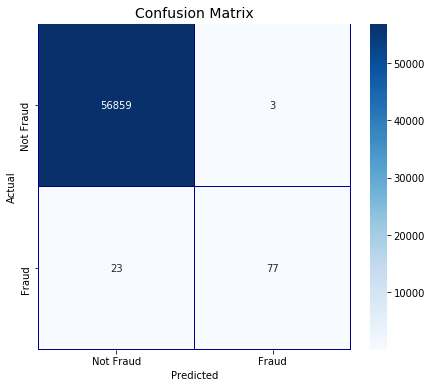

AUC-ROC Curve:  0.8849736203439907


In [31]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(7,6))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt = 'd')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

auc = roc_auc_score(valid_df[target].values, preds)
print('AUC-ROC Curve: ', auc)

### The most important features are V17, V12, V14, V10, V11, V16.

#### We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

## ROC-AUC score
Area under curve : AUC is an abbrevation for area under the curve. It is used in classification analysis in order to determine which of the used models predicts the classes best. An example of its application are ROC curves. Here, the true positive rates are plotted against false positive rates.


# AdaBoostClassifier AKA Adaptive Boosting Classifier 

In [33]:
clf = AdaBoostClassifier(random_state=RANDOM_STATE,
                         algorithm='SAMME.R',
                         learning_rate=0.8,
                             n_estimators=NUM_ESTIMATORS)
clf.fit(train_df[predictors], train_df[target].values)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.8,
                   n_estimators=100, random_state=2018)

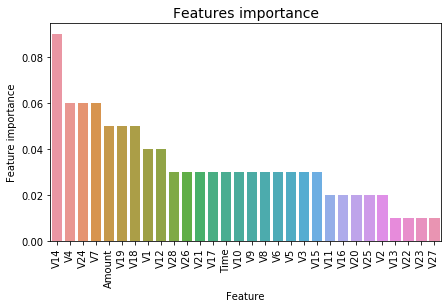

In [34]:
preds = clf.predict(valid_df[predictors])
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

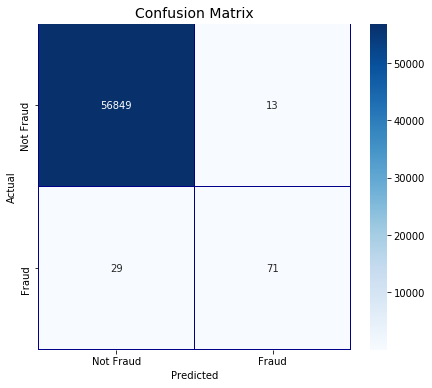

AUC-ROC Curve:  0.8548856881572932


In [35]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])
fig, (ax1) = plt.subplots(ncols=1, figsize=(7,6))
sns.heatmap(cm, 
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'],
            annot=True,ax=ax1,
            linewidths=.2,linecolor="Darkblue", cmap="Blues", fmt = 'd')
plt.title('Confusion Matrix', fontsize=14)
plt.show()

auc = roc_auc_score(valid_df[target].values, preds)
print('AUC-ROC Curve: ', auc)

In [40]:
# Prepare the train and valid datasets
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(valid_df[predictors], valid_df[target].values)

#What to monitor (in this case, **train** and **valid**)
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [41]:
MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 85 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 85 #Print out metric result
model = xgb.train(params, 
                dtrain, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.881236	valid-auc:0.864826
Multiple eval metrics have been passed: 'valid-auc' will be used for early stopping.

Will train until valid-auc hasn't improved in 85 rounds.
[85]	train-auc:0.945255	valid-auc:0.927389
[170]	train-auc:0.983896	valid-auc:0.965111
[255]	train-auc:0.992533	valid-auc:0.973214
[340]	train-auc:0.995322	valid-auc:0.975119
[425]	train-auc:0.996685	valid-auc:0.976379
[510]	train-auc:0.997573	valid-auc:0.975431
Stopping. Best iteration:
[430]	train-auc:0.996745	valid-auc:0.976645



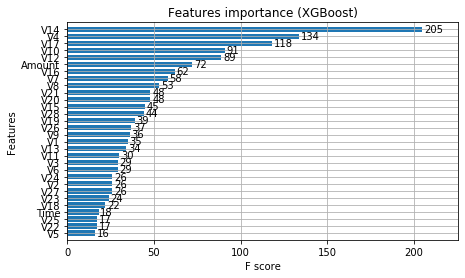

In [45]:
fig, (ax) = plt.subplots(ncols=1, figsize=(7,4))
xgb.plot_importance(model, height=0.8, title="Features importance (XGBoost)", ax=ax) 
plt.show()


In [48]:
preds = model.predict(dtest)
roc_auc_score(valid_df[target].values, preds)

0.9752092786043403

# Modeling Approach 2



 Random Forest

In [54]:
RF_model = RandomForestClassifier(random_state=42, n_estimators = 100)
RF_model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Sensitivity(%)[1]: 93.87755102040816
Specificity(%)[0]: 97.61008722566122


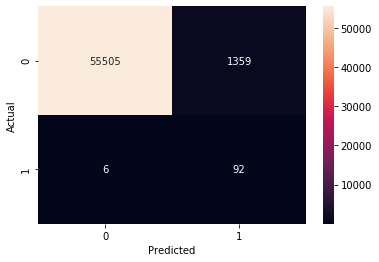

In [55]:
pred = RF_model.predict(X_test)
report = classification_report(y_test, pred, output_dict = True)
conf = confusion_matrix(y_test, pred)
ax = sns.heatmap(conf , annot=True, fmt = 'd')
ax.set(xlabel = 'Predicted', ylabel = 'Actual')
specificity = (conf[0][0]/(conf[0][0] + conf[0][1])) * 100
sensitivity = (conf[1][1]/(conf[1][0] + conf[1][1])) * 100

print("Sensitivity(%)[1]:", sensitivity)
print("Specificity(%)[0]:",specificity)


Sensitivity(%)[1]: 93.87755102040816
Specificity(%)[0]: 98.7426139561058


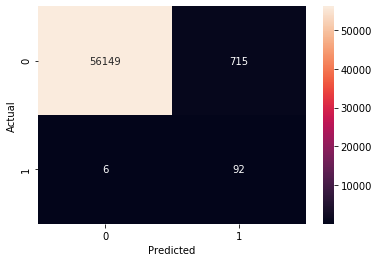

In [9]:
prob = RF_model.predict_proba(X_test)
pred = (prob[:,1] >= 0.55).astype(bool)
report = classification_report(y_test, pred, output_dict = True)
conf = confusion_matrix(y_test, pred)
ax = sns.heatmap(conf , annot=True, fmt = 'd')
ax.set(xlabel = 'Predicted', ylabel = 'Actual')
specificity = (conf[0][0]/(conf[0][0] + conf[0][1])) * 100
sensitivity = (conf[1][1]/(conf[1][0] + conf[1][1])) * 100

print("Sensitivity(%)[1]:", sensitivity)
print("Specificity(%)[0]:",specificity)



Area under Curve ROC:  0.9631008248825699


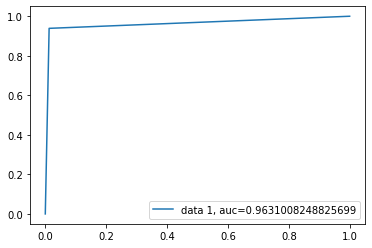

In [10]:
fpr, tpr, _ = roc_curve(y_test,pred)
auc = roc_auc_score(y_test, pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
print('Area under Curve ROC: ', auc)
plt.show()